In [1]:
import numpy as np
import glob
import os

# CREATING DATASET
+ ## DATASET

In [2]:
TEST_DATA="F:/MARATHI CHARECTORPROJECTMINI/DATASET/TEST/"
TRAIN_DATA="F:/MARATHI CHARECTORPROJECTMINI/DATASET/TR/"
DATA="F:/MARATHI CHARECTORPROJECTMINI/DATASET/"


In [3]:
FOLDERS=os.listdir(DATA)
IMAGES=[]
LABELS=[]
import cv2
count=0
labels=[]
labels_name=[]

In [4]:
for i in os.listdir(DATA):
    p=os.path.join(DATA,i)
    io=int(i)
    labels.append(io)
    labels_name.append(i)
    for j in os.listdir(p):
        pat=os.path.join(p,j)
        img=cv2.imread(pat)
        IMAGES.append(img)
        LABELS.append(io)
NoOfClasses=len(labels)
print("No Of Classes {}".format(NoOfClasses))


No Of Classes 36


In [5]:
print(len(LABELS))
print(len(IMAGES))

52611
52611


In [6]:
print("Current Image Dataset Have Size {} and Current Labels Have Size {}".format(len(IMAGES),len(LABELS)))

Current Image Dataset Have Size 52611 and Current Labels Have Size 52611


+ ### CREATING ARRAY OF LISTS OF TRAINING DATA

In [7]:
IMAGES=np.array(IMAGES)
print(" Current Training Image Dataset Size Is {}".format(IMAGES.shape))

 Current Training Image Dataset Size Is (52611, 28, 28, 3)


In [8]:
LABELS=np.array(LABELS)
print(" Current Training Image Label Dataset Size Is {}".format(LABELS.shape))

 Current Training Image Label Dataset Size Is (52611,)


In [9]:
from sklearn.model_selection import train_test_split

# Splitting Data

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(IMAGES,LABELS,test_size=0.2)

In [11]:
print(" We Have {} Training Images and {} Training Labels ".format(X_train.shape,Y_train.shape))

 We Have (42088, 28, 28, 3) Training Images and (42088,) Training Labels 


In [12]:
print(" We Have {} Testing Images and {} Testing Labels ".format(X_test.shape,Y_test.shape))

 We Have (10523, 28, 28, 3) Testing Images and (10523,) Testing Labels 


# CREATING VALIDATION DATASET

In [13]:
X_train,X_validation,Y_train,Y_validation=train_test_split(X_train,Y_train,test_size=0.2)

In [14]:
print("we Have {} Training Images".format(X_train.shape))
print("we Have {} Testing Images".format(X_test.shape))
print("we Have {} Validation Images".format(X_validation.shape))

we Have (33670, 28, 28, 3) Training Images
we Have (10523, 28, 28, 3) Testing Images
we Have (8418, 28, 28, 3) Validation Images


In [15]:
len(Y_train)

33670

# VISUALIZATION OF DATA DISTRIBUTION

In [16]:
NO_OF_SAMPLES=[]
for i in labels:
    NO_OF_SAMPLES.append(len(np.where(Y_train==i)[0]))
Y_train

array([23,  8, 12, ..., 33, 16, 25])

In [17]:
for i in range(len(labels)):
    print(" Data {}   Have    {}   Samples ".format(labels[i],NO_OF_SAMPLES[i]))

 Data 0   Have    944   Samples 
 Data 1   Have    876   Samples 
 Data 10   Have    928   Samples 
 Data 11   Have    1048   Samples 
 Data 12   Have    904   Samples 
 Data 13   Have    948   Samples 
 Data 14   Have    910   Samples 
 Data 15   Have    888   Samples 
 Data 16   Have    916   Samples 
 Data 17   Have    924   Samples 
 Data 18   Have    1170   Samples 
 Data 19   Have    988   Samples 
 Data 2   Have    956   Samples 
 Data 20   Have    946   Samples 
 Data 21   Have    918   Samples 
 Data 22   Have    899   Samples 
 Data 23   Have    933   Samples 
 Data 24   Have    936   Samples 
 Data 25   Have    936   Samples 
 Data 26   Have    924   Samples 
 Data 27   Have    922   Samples 
 Data 28   Have    916   Samples 
 Data 29   Have    908   Samples 
 Data 3   Have    900   Samples 
 Data 30   Have    917   Samples 
 Data 31   Have    1102   Samples 
 Data 32   Have    862   Samples 
 Data 33   Have    912   Samples 
 Data 34   Have    903   Samples 
 Data 35   Have

In [18]:
import matplotlib.pyplot as plt

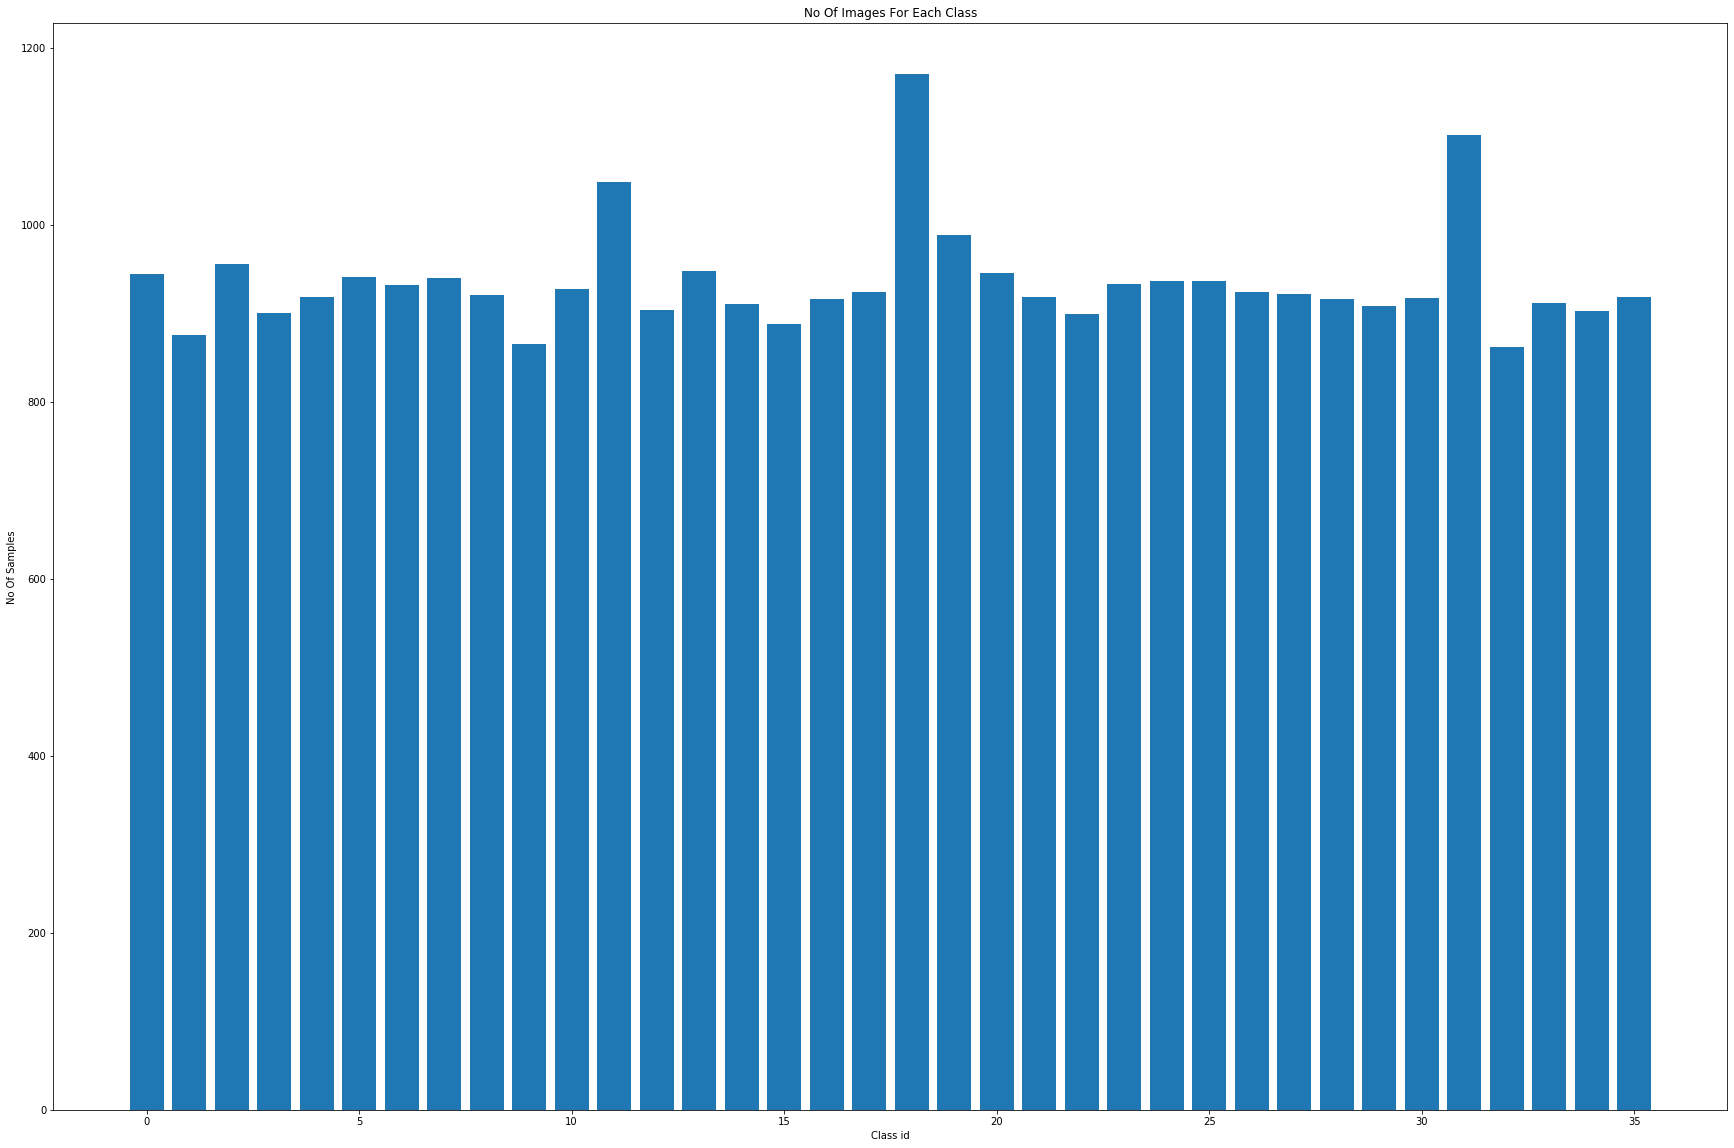

In [19]:
plt.figure(figsize=(30,20))
plt.bar(labels,NO_OF_SAMPLES)
plt.title("No Of Images For Each Class")
plt.xlabel("Class id")
plt.ylabel("No Of Samples")
plt.show()

# PREPROCESSING THE IMAGE DATA

In [20]:
def PreProcessing(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img

### NOW APPLYING TO IMAGE ARRAYS

In [21]:
X_train=np.array(list(map(PreProcessing,X_train)))

In [22]:
X_train.shape

(33670, 28, 28)

In [23]:
X_test=np.array(list(map(PreProcessing,X_test)))

In [24]:
X_test.shape

(10523, 28, 28)

In [25]:
X_validation=np.array(list(map(PreProcessing,X_validation)))

In [26]:
X_validation.shape

(8418, 28, 28)

In [27]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)

In [28]:
Y_validation.shape

(8418,)

In [29]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


# NOW WE ARE USING IMAGE DATA GENERATOR

In [30]:
datagen=ImageDataGenerator(width_shift_range=0.1,
                          height_shift_range=0.1,
                              zoom_range=0.2,
                          shear_range=0.1,
                           rotation_range=20)

In [31]:
datagen.fit(X_train)

In [32]:
from keras.utils.np_utils import to_categorical

In [33]:
Y_train=to_categorical(Y_train,num_classes=NoOfClasses)
Y_test=to_categorical(Y_test,num_classes=NoOfClasses)
Y_validation=to_categorical(Y_validation,num_classes=NoOfClasses)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout,Flatten,Dense
from keras.optimizers import SGD, Adam

In [35]:
def MyModel():
    NoofFilters=60
    SizeOfFilter1=(5,5)
    SizeOfFilter2=(3,3)
    sizeofpool=(2,2)
    noofNodes=500
    model=Sequential()
    
    model.add(Conv2D(NoofFilters,SizeOfFilter1,input_shape=(28,28,1)))
    model.add(Conv2D(NoofFilters,SizeOfFilter1,activation='relu'))
    model.add(MaxPooling2D(pool_size=sizeofpool))
    
    model.add(Conv2D(NoofFilters//2,SizeOfFilter2,activation='relu'))
    model.add(Conv2D(NoofFilters//2,SizeOfFilter2,activation='relu'))
    
    model.add(MaxPooling2D(pool_size=sizeofpool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(noofNodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(output_dim = NoOfClasses, activation = 'sigmoid'))
    
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [36]:
model=MyModel()

C:\Users\Hp\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=36)`


In [37]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 30)         

In [38]:
print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)

history=model.fit_generator(datagen.flow(X_train,Y_train,batch_size=50),
                   epochs=20,validation_data=(X_validation,Y_validation))

SAVE_PATH="F:/MARATHI CHARECTORPROJECTMINI/"

(33670, 28, 28, 1)
(33670, 36)
(8418, 28, 28, 1)
(8418, 36)
Epoch 1/20
674/674 [==============================] - 83s 123ms/step - loss: 2.6676 - accuracy: 0.2345 - val_loss: 1.1738 - val_accuracy: 0.6777
Epoch 2/20
674/674 [==============================] - 78s 116ms/step - loss: 1.6412 - accuracy: 0.4907 - val_loss: 0.7734 - val_accuracy: 0.7926
Epoch 3/20
674/674 [==============================] - 83s 123ms/step - loss: 1.3101 - accuracy: 0.5904 - val_loss: 0.5881 - val_accuracy: 0.8444
Epoch 4/20
674/674 [==============================] - 78s 115ms/step - loss: 1.1474 - accuracy: 0.6411 - val_loss: 0.4189 - val_accuracy: 0.8874
Epoch 5/20
674/674 [==============================] - 153s 227ms/step - loss: 1.0556 - accuracy: 0.6719 - val_loss: 0.3907 - val_accuracy: 0.8984
Epoch 6/20
674/674 [==============================] - 165s 244ms/step - loss: 0.9673 - accuracy: 0.6933 - val_loss: 0.3363 - val_accuracy: 0.9082
Epoch 7/20
674/674 [==============================] - 179s 266ms/ste

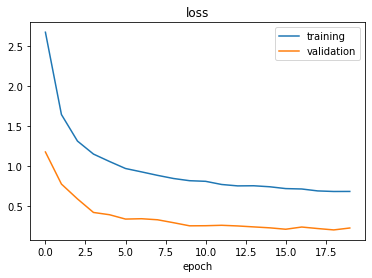

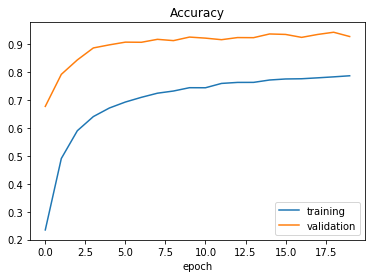

Test Score 0.22571099368347525
Test Accuracy 0.9323387145996094


In [39]:
import tensorflow as tf
from keras.models import load_model
model.save(os.path.join(SAVE_PATH,"HYPERPARAMETERIZED1_IMAGESIZE_28_MODEL3_DETECTION_DAY_31_05_2020.h5"))


plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.savefig(os.path.join(SAVE_PATH,"HYPERPARAMETERIZED1_HYPERPARAMETERIZED1_LOSS_MODEL3_DETECTION_DAY_31_05_2020"))

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.savefig(os.path.join(SAVE_PATH,"HYPERPARAMETERIZED1_ACCURACY_MODEL3_DETECTION_DAY_31_05_2020"))
plt.show()

score=model.evaluate(X_test,Y_test,verbose=0)

print("Test Score {}".format(score[0]))
print("Test Accuracy {}".format(score[1]))